# **Demographic Patterns of Suicide in West Germany**
### `Author`: [Muhammad Naeem](https://www.kaggle.com/muhammadnaeem779/code)

# **About Data (Metadata)**
Data from Heuer (1979) on suicide rates in West Germany classified by age, sex, and method of suicide.
A data frame with 306 observations and 6 variables.

Column | Description 
---------|----------
 Freq | frequency of suicides 
 sex | factor indicating sex (male, female). 
 method | factor indicating method used. (poison, cookgas, toxicgas, hang, drown) 
 age | age (rounded).
 age.group | factor. Age classified into 5 groups
 method2 | factor indicating method used (same as method but some levels are merged).


[Dataset](https://www.kaggle.com/datasets/utkarshx27/suicide-rates-in-germany)

# **Questions**
1. What is the count and percentage of each sex (male and female) in the dataset 
2. What is the count and percentage of each suicide method in the dataset? 
3. How did suicide rates differ between males and females in West Germany?
4. What trends can be observed in suicide frequencies among different age groups?
5. How did suicidality rates vary between genders for different suicide methods?
6. How did suicide rates in West Germany differ between age groups for each gender?
7. How did suicide rates vary among age groups for different suicide methods?

# **Import Libraries**

In [1]:
# import libraries

# to handle the data
import numpy as np 
import pandas as pd 

# to visualize the data
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**
Load the dataset by using `Pandas` library

In [2]:
df = pd.read_csv("Suicide.csv")
df.head()

,Unnamed: 0,Freq,sex,method,age,age.group,method2
0,1,4,male,poison,10,10-20,poison
1,2,0,male,cookgas,10,10-20,gas
2,3,0,male,toxicgas,10,10-20,gas
3,4,247,male,hang,10,10-20,hang
4,5,1,male,drown,10,10-20,drown


## **Observations:**

> - We have 7 columns in our dataset.
> 
> - The first column is **Unnamed: 0** which is totally meaningless column from suicide dataset.
> 
> - 2nd column **Freq** shows the frequency of every row.
> 
> -  3rd column **sex** shows the gender which are present in this data.
> 
> - 4th column **method** represents the method of  committed suicide.
> 
> - 5th column **age** represents the age of person who committed suicide.
> 
> - 6th column **age.group** represents the groups of age in the specific range.
> 
> - 7th column **method2** represents the method of  committed suicide.

# **Data Wrangling:**
**Let's check the shape of the dataset:**

In [5]:
# check the shape of the dataset
print(f"The shape of the dataset is {df.shape}")

The shape of the dataset is (306, 7)


**Let's check the types of the variables:**

In [6]:
print(f"The types of the variables are:\n{df.dtypes}")

The types of the variables are:
Unnamed: 0     int64
Freq           int64
sex           object
method        object
age            int64
age.group     object
method2       object
dtype: object


> There are three integer,one float and three object type variables.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  306 non-null    int64 
 1   Freq        306 non-null    int64 
 2   sex         306 non-null    object
 3   method      306 non-null    object
 4   age         306 non-null    int64 
 5   age.group   306 non-null    object
 6   method2     306 non-null    object
dtypes: int64(3), object(4)
memory usage: 16.9+ KB


In [8]:
df.describe()

,Unnamed: 0,Freq,age
count,306.000000,306.000000,306.00000
mean,153.500000,173.797386,50.00000
std,88.478811,281.000084,24.53502
min,1.000000,0.000000,10.00000
25%,77.250000,10.250000,30.00000
50%,153.500000,59.000000,50.00000
75%,229.750000,178.750000,70.00000
max,306.000000,1381.000000,90.00000


### **Drop the unnecessary data:**
Drop the Unnamed: 0 column from the data.

In [9]:
df.drop(columns="Unnamed: 0", inplace=True)

### **Let's check the missing values in the data:**

In [11]:
print(f"The missing values in the dataset are:\n{df.isnull().sum()}")

The missing values in the dataset are:
Freq         0
sex          0
method       0
age          0
age.group    0
method2      0
dtype: int64


## **Observations:**
> - There is no missing value in the dataset.

### **Let's check the duplicates in the dataset:**

In [13]:
print(f"The duplicate value in the dataset is: {df.duplicated().sum()}")

The duplicate value in the dataset is: 0


# **EDA**
### **Let's see the unique values in every column:**

In [15]:
print(f"The unique values of every column in the dataset is:\n{df.nunique()}")

The unique values of every column in the dataset is:
Freq         175
sex            2
method         9
age           17
age.group      5
method2        8
dtype: int64


### **Let's see the unique values of categorical variables:**

In [19]:
# Unique values of sex
print("The unique values of sex are : ", df["sex"].unique())

#Unique vaues of method
print("The unique values of method are : ", df["method"].unique())

#Unique vaues of method2
print("The unique values of method2 are : ", df["method2"].unique())

The unique values of sex are :  ['male' 'female']
The unique values of method are :  ['poison' 'cookgas' 'toxicgas' 'hang' 'drown' 'gun' 'knife' 'jump' 'other']
The unique values of method2 are :  ['poison' 'gas' 'hang' 'drown' 'gun' 'knife' 'jump' 'other']


## **Observations:**

> - The sex column include two unique values, one is male and second is female.
> 
> - It means this data has only two genders.
> 
> - The methods discussed in this datasets are poison, cookgas, toxicgas, hang, drown, gun, knife, jump and many others.

In [20]:
df["method"].value_counts()

method
poison      34
cookgas     34
toxicgas    34
hang        34
drown       34
gun         34
knife       34
jump        34
other       34
Name: count, dtype: int64

## **Count-Percentage of sex column:**

In [29]:
# Create pie plot
fig = px.pie(df, names='sex', color_discrete_sequence=['#D1FF66', '#94EE00',],
             title='Percentage of male and female')

# Set the figure size
fig.update_layout(width=900, height=400)  # Width: 800 pixels, Height: 600 pixels

# Add interactivity
fig.update_layout(transition_duration=500)  

# Display plot
fig.show()

## **Observations:**
> - This plot represents that male and female count has the same value in a sex column in this data.

## **Count-Percentage of Method column:**

In [31]:
# Create pie plot
fig = px.pie(df, names='method',
             title='Count-Percentage of Method column')

# Set the figure size
fig.update_layout(width=900, height=400)  # Width: 800 pixels, Height: 600 pixels

# Add interactivity
fig.update_layout(transition_duration=500)  

# Display plot
fig.show()

## **Observations:**
> - This plot represents that the count of each method has equal in a method column.

## **Suicide Rates by Gender in West Germany:** 

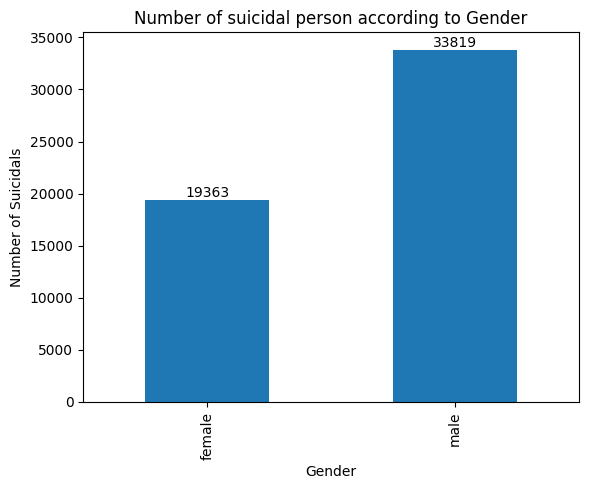

In [35]:
fig = df.groupby(["sex"])["Freq"].sum().plot(kind="bar")

plt.title("Number of suicidal person according to Gender")
plt.ylabel("Number of Suicidals")
plt.xlabel("Gender")

for bars in fig.containers:
    fig.bar_label(bars)

## **Observations:**
> ### **Suicide Gender Disparity:**
> - The story depicts a significant gender gap in suicide rates. Men commit suicide at a rate of around **63.6%,** whereas women commit suicide at a rate of about **36.4%**.
> - The need to explore more into the underlying causes of these gender-based variations in suicide rates is highlighted by this dramatic discrepancy.

> ### **Prevalence of Male Suicide:**
> - The information shows that males commit the vast majority of suicides in this sample. This suggests that there is a serious problem with the mental health and wellbeing of males.
> - Various variables, such as cultural norms, conventional gender roles, and accessibility to mental health services, may have an impact on the rate of male suicide.

> ### **Women's Suicide Trends:**
> - Despite the lower suicide incidence among females in this dataset, it is important to take into account the particular difficulties and experiences that women face.

## **Trend of Suicide Frequencies by Age Group:**

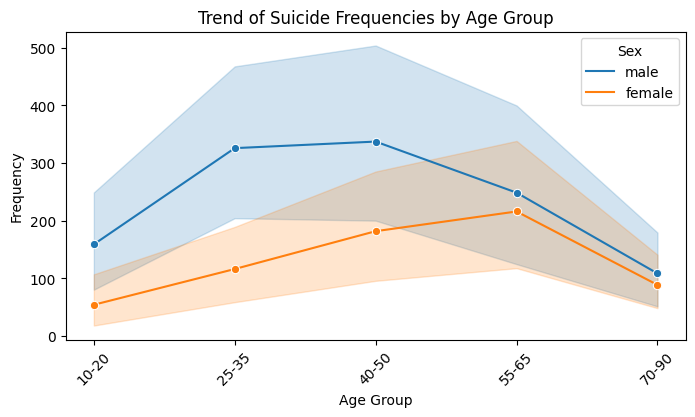

In [39]:
age_group_order = sorted(df['age.group'].unique())

# Select the figure size
plt.figure(figsize=(8, 4))
# Making line plot between age.group and Frequency on the base of Sex
sns.lineplot(data=df, x='age.group', y='Freq', hue='sex', sort=False, marker='o')
# Give the title  of the plot
plt.title('Trend of Suicide Frequencies by Age Group')
# Give the label of x-axis
plt.xlabel('Age Group')
# Give the label of y-axis
plt.ylabel('Frequency')
# Add legends
plt.legend(title='Sex')
plt.xticks(range(len(age_group_order)), age_group_order, rotation=45)
plt.show()

## **Observations:**

> ### **Age-Group Trends for Men:**
> - The age range with the highest prevalence of suicides among males is 40–50 years, followed by 25–35 years, 55–65 years, 10–20 years, and 70–90 years.
> - Notably, across all age categories, the frequency of male suicide continuously outpaces that of female suicide, highlighting a disturbing gender-based tendency in suicide rates.

> ### **Age-Group Trends for Women:**
> - The largest rate of suicide among females occurs between the ages of 55 and 65, followed by those between 40 and 50, 25 to 35, between 70 and 90, and between 10 and 20.
> - Similar to this, a gender discrepancy in suicide rates persists throughout all age groups, with male suicide frequency remaining greater than female suicide frequency.

> ### **Specific Age Group Interventions:**
> - The statistics emphasize the value of programs tailored to certain age groups. For instance, the high rate of suicide among people in the 40–50 and 25–35 age groups calls for specialized mental health initiatives that address the issues these age groups experience.
> - Recognizing that each age group may have unique pressures is significant; treating them is crucial for lowering suicide rates.


## **Suicidality rates by gender and method:**


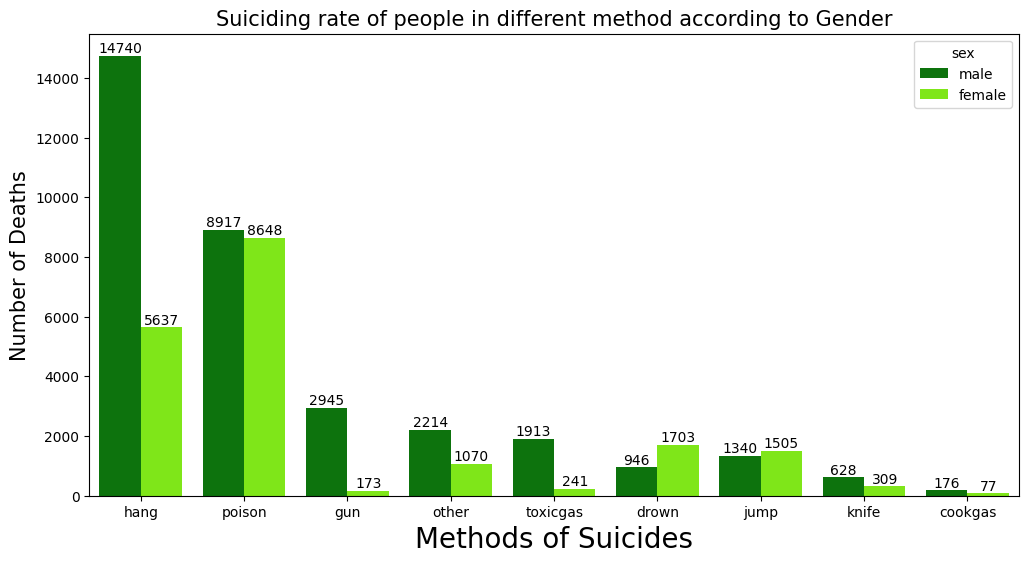

In [41]:
freq_method = df.groupby(["method", "sex"], as_index=False)["Freq"].sum().sort_values(by="Freq", ascending=False)

# Select the figure size 
plt.figure(figsize=(12,6))
# Make a barplot between method and Frequency on the base of Sex
fig = sns.barplot(data=freq_method, x="method", y="Freq", hue="sex", alpha=1, saturation=0.8, palette=["Green", 'chartreuse'])
# Give he title of the plot
plt.title("Suiciding rate of people in different method according to Gender", size=(15))
# Give the label of x-axis
plt.xlabel("Methods of Suicides", size=(20))
# Give the label of y-axis
plt.ylabel("Number of Deaths", size=(15))

for bars in fig.containers:
    fig.bar_label(bars)

## **Observations:**

> ### **Hanging:**
> - Hanging stands out as the most popular means of suicide among both males and girls. Hanging was used in about **27.7%** of male suicides and **10.6%** of female suicides.
> - This information emphasizes how prevalent it is for people of both sexes to commit suicide, which justifies targeted measures to prevent it.

> ### **Poison:**
> - For both sexes, poisoning is the second most typical approach. About **16.76%** of suicides in men and **16.26%** in women included poisoning.
> Because poisoning is such a common tactic, it is essential to comprehend the causes of its widespread usage and put preventative measures particular to it into place.

> ### **Other Techniques:**
> - While the majority of suicides are committed by hanging or poisoning, it's important to recognize that other, albeit less often utilized, techniques are sometimes employed.
> - The risk factors and conditions associated with these less common ways may be particular to them, necessitating a comprehensive strategy for suicide prevention that covers a range of techniques.

> ### **Unbiased Gender Prevalence:**
> - It's interesting that hanging and poisoning are common suicide techniques for both sexes, showing a degree of gender-neutral danger for doing so.
> - In addition to acknowledging the differences in overall suicide rates across genders, suicide prevention measures should take into consideration this prevalence's lack of gender bias.

## **Suicide Rates by Age Group and Gender in West Germany:**

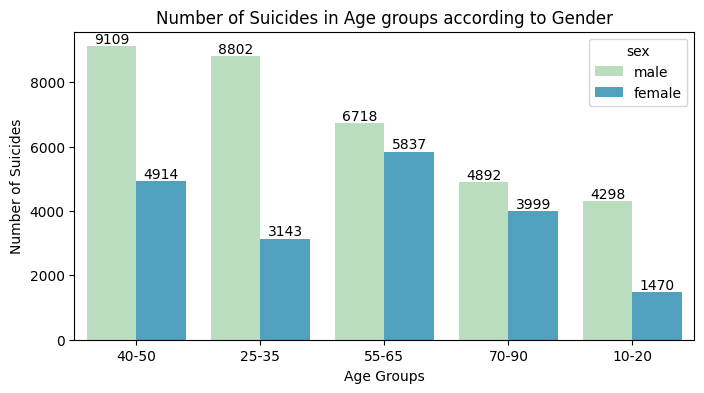

In [42]:
age_grp_freq = df.groupby(["age.group", "sex"], as_index=False)['Freq'].sum().sort_values(by="Freq", ascending=False)

# Select the figure size
plt.figure(figsize=(8,4))
# Make the barplot between age.group and Frequency  on the base of Sex
fig = sns.barplot(data=age_grp_freq, x="age.group", y="Freq", hue="sex", alpha=1, saturation=0.8, palette="GnBu")
# Give the title of the plot
plt.title("Number of Suicides in Age groups according to Gender")
# Give the label of x-axis
plt.xlabel("Age Groups")
# Give the label of y=axis
plt.ylabel("Number of Suicides")

for bars in fig.containers:
    fig.bar_label(bars)

## **Observations:**

> ### **Highest Risk Age Groups:**
> - The data shows the highest suicide rate for males was in the 40-50 year old age group, where **17.1%** of all male suicides occurred.
> - The second highest male suicide rate was **16.5%** in the 25-35 year old age group.
> - Females had their highest suicide rate of **9.2%** in the 40-50 year old group as well.

> ### **Potential Risk Factors by Age:**
> - For the **40-50** age group, stress from career responsibilities and family obligations during mid-life may contribute to higher rates.
> - For ages **25-35**, major life transitions like finishing education and starting a career or family could increase stress and vulnerability for young adult males.

> ### **Trends by Gender:**
> - Rates were consistently higher for males across all age groups.
> - However, females also saw elevated risks during mid-life challenges like ages 40-50, though at a lower rate than males.

> ### **Lower Risk Age Groups:**
> - Suicide rates generally trended downwards for both sexes as ages increased past 50 years old.
> - Younger ages 10-20 had the lowest rates, likely due to less life responsibilities and parental guidance.

> ### **Overall Trends:**
> - In summary, this data shows **mid-life** as a high risk period for suicide among both West German males and females. Younger and older age ranges saw lower suicide rates overall.

## **Suicide Rates by Age Group and Methods of committed suicide:**

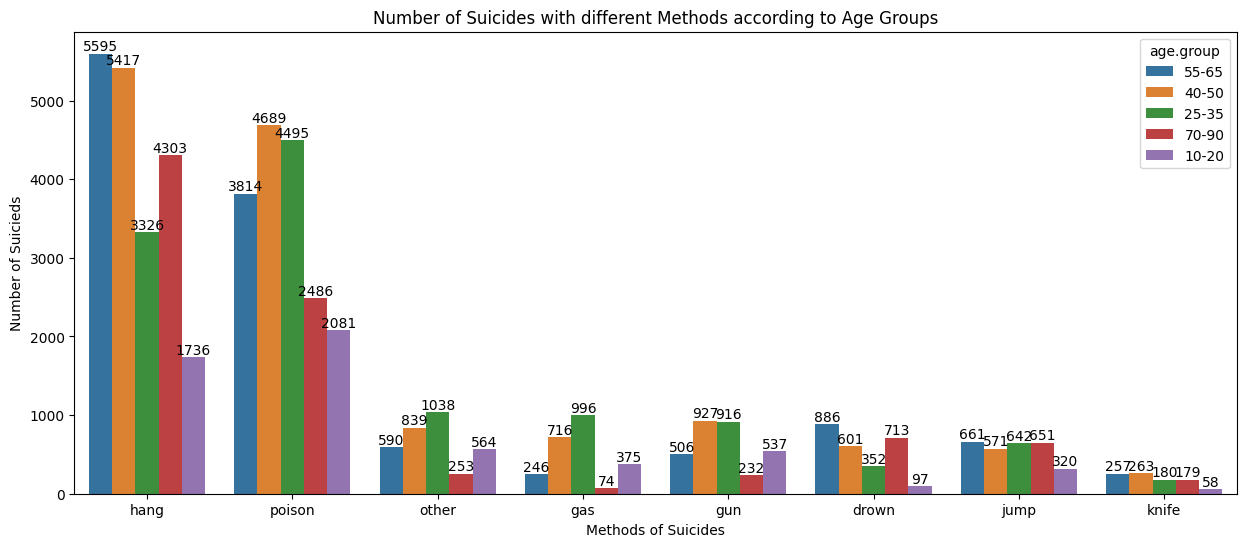

In [43]:
age_grp_mthd = df.groupby(["age.group", "method2"], as_index=False)['Freq'].sum().sort_values(by="Freq", ascending=False)

# Select the figure size
plt.figure(figsize=(15,6))
# Make a barplot between method2 and frequency  on the base of age.group
fig = sns.barplot(data=age_grp_mthd, x="method2", y="Freq", hue="age.group", alpha=1, saturation=0.7)
# Add Title of the plot
plt.title("Number of Suicides with different Methods according to Age Groups")
# Add label of x-axis
plt.xlabel("Methods of Suicides")
# Add label of y-axis
plt.ylabel("Number of Suicieds")

for bars in fig.containers:
    fig.bar_label(bars)

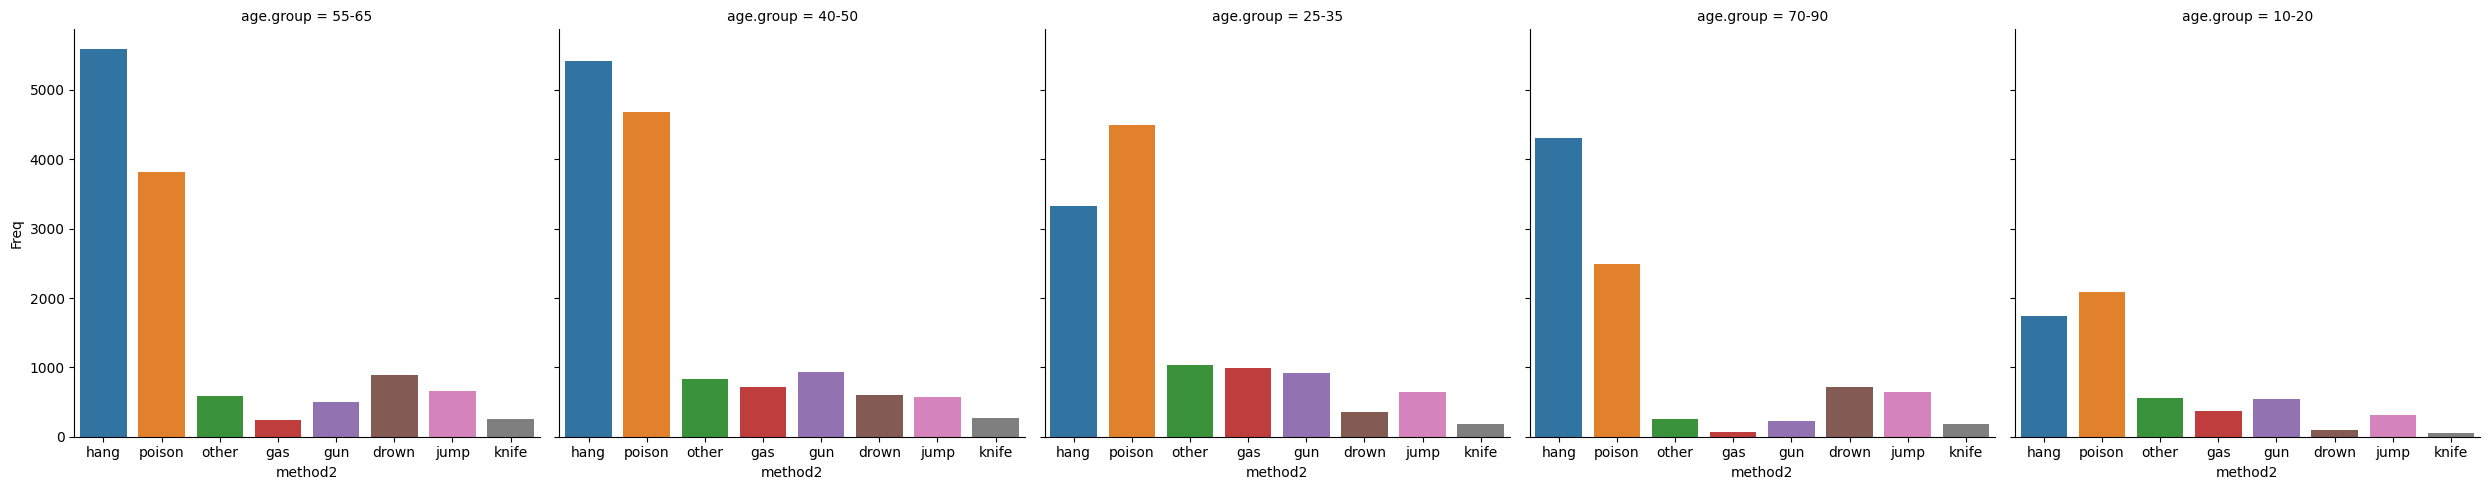

In [50]:
age_grp_mthd = df.groupby(["age.group", "method2"], as_index=False)['Freq'].sum().sort_values(by="Freq", ascending=False)

# Make a catplot between method2 and frequency on the base of age.group
fig = sns.catplot(data=age_grp_mthd, x="method2", y="Freq",kind="bar", col="age.group")

## **Observations:**

> ### **Highest Rates by Age and Gender:**
> - Males ages 40-50 had the highest rate at 17.1% of all suicides. This mid-life period brings significant stress from career and family obligations.
> - Males ages 25-35 were also high risk at 16.5%. Leaving education and adjusting to independent living takes an emotional toll on many young adults.
> - Females ages 40-50 followed at 9.2%, reflecting common mid-life challenges faced by both genders.

> ### **Hanging - A Highly Lethal Option:**
> - This method accounted for over a quarter of suicides in the 40-50 age bracket, who were under intense stress. Its efficiency makes hanging an unfortunate choice for those seeking a quick death.

> ### **Poisoning - Accessible but Prolonged Suffering:**
> - Ages 40-50 and 25-35 heavily utilized poisoning at over 20% each, likely due to easy access through medicines or household chemicals. However, it causes a drawn-out demise.

> ### **Lower Rates in Childhood and Old Age:**
> - Younger people had parental protection and fewer responsibilities. Older adults gained resilience, yet social isolation can be problematic.

> ### **Commonality of Top Methods:**
> - Hanging and poisoning together surpassed 50% of deaths across all age groups, indicating a need for restricting access to dangerously lethal means.

> ### **Conclusion:**
> - In conclusion, mid-life crisis years appeared riskiest, with gender-influenced factors impacting methods chosen in moments of desperation.

## **Suicide Trends in West Germany: A Heatmap Analysis:**

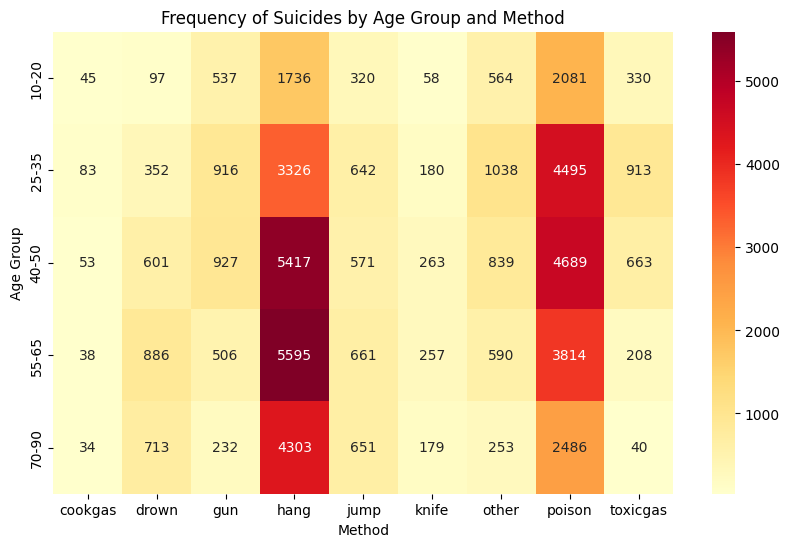

In [51]:
pivot_table = df.pivot_table(index='age.group', columns='method', values='Freq', aggfunc=np.sum)

# Select the figure size
plt.figure(figsize=(10, 6))
# Make a heatmap to check the relationship between variables
sns.heatmap(data=pivot_table, cmap='YlOrRd', annot=True, fmt='g')
# Give the title of the map
plt.title('Frequency of Suicides by Age Group and Method')
# Add label of x-axis
plt.xlabel('Method')
# Add label of y-axis
plt.ylabel('Age Group')
# Show the plot
plt.show()

## **Observations:**

> ### **Hanging Method:**
> - Ages 40-50 show the darkest red shading, indicating this group had the highest rates of suicide by hanging at 27%.
> - Ages 55-65 are also highly shaded red at 25%, reflecting continuing elevated risks.

> ### **Poisoning Method:**
> - Ages 40-50 appear in the darkest black tone, with 23% of suicides in this age bracket using poisoning.
> - Ages 25-35 follow closely with deep red shading at 21% poisoning deaths.

> ### **Other Methods:**
> - Lighter orange shades represent lower percentages across all age groups for methods like firearms, drowning, etc.

> ### **Age-Related Patterns:**
> - Younger ages 10-20 have the lightest shading, highlighting lower risks overall.
> - Shades gradually darken into midlife and then lighten in older years.

> ### **Summary:**
> - In summary, the heatmap depicts hanging and poisoning as the predominant suicide methods centered around midlife adults aged 40-50 in West Germany, according to percentages within each age demographic. Other means were utilized less frequently across all age brackets

# **Summary:** 
A detailed analysis of West Germany's suicide rates from 1979 gives insight into the state of the country's mental health. West Germany had a particular set of difficulties in this year, ranging from economic woes to the more general social changes of the period. Despite being expressed as a number, the suicide rate is a reflection of people's problems, social pressures, and continual change. It is crucial to situate this rate within both the historical framework and the larger global context in order to understand it.